# In-Depth Exploration of LIV Experiment: MSCs Morphology Using Afilament Program Output
## Model W20 and minimal actin length 0.5 micron


In [101]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from itertools import product
from itertools import product
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import mannwhitneyu

## Data Load

In [102]:
# Constants
AGGREGATED_STATISTICS_FILE = 'agg_stat/cell_stat.csv'
ACTIN_STATISTICS_DIRECTORY = 'actin_stat'

def extract_directory_info(directory):
    """
    Extract directory information such as minimum length, treatment and model.

    Parameters:
    directory (str): The directory path.

    Returns:
    Tuple[str]: A tuple containing min_len, treatment and model as strings.
    """
    directory = Path(directory)
    min_len, treatment, model = directory.name.split("_")[-1], *directory.parent.name.split("_")
    return min_len, treatment, model

def load_aggregated_statistics(directory):
    """
    Load and process aggregated statistics from the specified directory.
    """
    min_len, treatment, model = extract_directory_info(directory)

    # Load the CSV file into a pandas DataFrame
    statistics_df = pd.read_csv(directory / AGGREGATED_STATISTICS_FILE)

    # Remove rows with all NaN values
    statistics_df = statistics_df.dropna(how='all')

    # Add the minimum length, treatment, and model details as new columns in the DataFrame
    statistics_df = statistics_df.assign(
        min_len_threshold=min_len,
        treatment=treatment,
        actin_model=model
    )

    return statistics_df

def load_individual_actin_statistics(base_directory):
    """
    Load individual actin statistics from the specified base directory.
    """
    base_directory = Path(base_directory)
    min_len, treatment, model = extract_directory_info(base_directory)

    actin_statistics_dir = base_directory / ACTIN_STATISTICS_DIRECTORY

    dataframes = []
    for file_name in actin_statistics_dir.iterdir():
        # Example of file_name.stem is img_num_0__cell_num_0_bottom_actin_stat
        # Extract 'img_num', 'cell_num' and 'part' from the filename
        img_num_index, cell_num_index, part_index = 2, 6, 7
        img_num, cell_num = map(int, [file_name.stem.split('_')[i] for i in (img_num_index, cell_num_index)])
        part = file_name.stem.split('_')[part_index]

        current_df = pd.read_csv(file_name)
        current_df = current_df.dropna(how='all')

        # Add the image number, cell number and part details as new columns in the DataFrame
        current_df = current_df.assign(
            img_num=img_num,
            cell_num=cell_num,
            part=part
        )
        dataframes.append(current_df)

    combined_df = pd.concat(dataframes)

    combined_df = combined_df.assign(
        min_len_threshold=min_len,
        treatment=treatment,
        actin_model=model
    )

    return combined_df

# Define base directory
base_directory = Path(r"D:\BioLab\Current_experiments\afilament\2023.02.14_DAPI_Alexa488_LIV_Experiment\Second_trial")

# Define treatments, models, and minimum lengths
treatments = ["Control", "LIV"]
models = ["w200", "w20"]
min_lengths = ["0.5", "1", "2"]

# Generate the list of directories
directories = [base_directory / f"{treatment}_{model}" / f"analysis_data_min_len_{min_length}"
               for treatment in treatments
               for model in models
               for min_length in min_lengths]

# Load and concatenate the data from all directories into a single DataFrame
aggregated_statistics_df = pd.concat([load_aggregated_statistics(directory)
                                      for directory in directories], ignore_index=True)

# Load and concatenate the individual actin data from all directories into a single DataFrame
individual_actin_statistics_df = pd.concat([load_individual_actin_statistics(directory)
                                            for directory in directories], ignore_index=True)

In [103]:
aggregated_statistics_df

,Image_name,Img_num,Cell_num,"Nucleus_volume, cubic_micrometre","Nucleus_length, micrometre","Nucleus_width, micrometre","Nucleus_high, micrometre",Nucleus_total_intensity,Total_fiber_num,Cap_fiber_num,...,Fiber_intensity_bottom,F-actin_signal_intensity_whole,F-actin_signal_intensity_cap,F-actin_signal_intensity_bottom,"Branching_nodes_total, #","Branching_nodes_cap, #","Branching_nodes_bottom, #",min_len_threshold,treatment,actin_model
0,control-Experiment-903-LSM Plus Processing-01-...,0.0,0.0,753.091148,15.613676,12.752785,6.30,1.080275e+10,117.0,72.0,...,3.128469e+08,2.998215e+09,1.496611e+09,1.501079e+09,11.0,8.0,4.0,0.5,Control,w200
1,control-Experiment-903-LSM Plus Processing-01-...,0.0,1.0,781.937727,20.123216,12.558827,5.46,1.249183e+10,127.0,66.0,...,9.462774e+08,4.565868e+09,1.519939e+09,3.043238e+09,34.0,5.0,30.0,0.5,Control,w200
2,control-Experiment-903-LSM Plus Processing-01-...,0.0,2.0,1490.179954,27.396668,24.438798,4.41,2.038142e+10,203.0,116.0,...,7.942534e+09,2.070085e+10,1.035361e+10,2.042239e+10,240.0,162.0,200.0,0.5,Control,w200
3,control-Experiment-903-LSM Plus Processing-01-...,0.0,3.0,776.522389,17.989671,17.553264,4.83,1.353296e+10,91.0,44.0,...,9.614648e+08,6.145312e+09,2.487907e+09,3.655151e+09,48.0,16.0,18.0,0.5,Control,w200
4,control-Experiment-903-LSM Plus Processing-01-...,0.0,4.0,2951.329403,31.033394,23.129576,8.82,2.699660e+10,479.0,197.0,...,3.288107e+09,2.601089e+10,1.238052e+10,1.363084e+10,394.0,210.0,183.0,0.5,Control,w200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,1.0,1541.139430,19.686809,22.790149,5.88,1.828570e+10,34.0,18.0,...,1.090748e+08,2.051732e+10,1.001048e+10,1.050318e+10,9.0,4.0,0.0,2,LIV,w20
1268,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,2.0,1245.772570,20.802072,20.802072,5.46,1.120458e+10,42.0,2.0,...,9.794342e+08,2.075115e+10,7.042404e+09,1.370390e+10,12.0,0.0,6.0,2,LIV,w20
1269,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,3.0,1555.762446,21.577907,18.523057,6.30,1.497844e+10,48.0,33.0,...,2.952257e+08,1.663872e+10,8.227846e+09,8.418599e+09,26.0,20.0,1.0,2,LIV,w20
1270,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,4.0,1862.147858,24.487287,21.383948,5.67,2.254375e+10,54.0,39.0,...,4.057047e+08,2.078478e+10,1.154349e+10,9.238858e+09,26.0,28.0,1.0,2,LIV,w20


In [104]:
individual_actin_statistics_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Intensity,img_num,cell_num,part,min_len_threshold,treatment,actin_model
0,0,3.491257,1.682077,5.872562,73,172084826,0,0,bottom,0.5,Control,w200
1,1,0.533386,0.243462,0.129859,12,2684266,0,0,bottom,0.5,Control,w200
2,2,1.939587,0.180109,0.349337,41,4785699,0,0,bottom,0.5,Control,w200
3,3,0.581876,0.166744,0.097024,13,2295362,0,0,bottom,0.5,Control,w200
4,4,0.533386,0.342976,0.182939,12,2731752,0,0,bottom,0.5,Control,w200
...,...,...,...,...,...,...,...,...,...,...,...,...
221346,29,3.103339,0.103340,0.320699,65,13507817,9,5,whole,2,LIV,w20
221347,30,4.073133,0.082311,0.335265,85,13016436,9,5,whole,2,LIV,w20
221348,31,3.685216,0.127218,0.468827,77,23801625,9,5,whole,2,LIV,w20
221349,32,3.103339,0.152902,0.474506,65,19813632,9,5,whole,2,LIV,w20


## Data Preparation and Transformation

In this section of our analysis, we carried out a series of optimizations to refine our dataset and facilitate future analyses. Our process entailed the following steps:

**Data Filtering**: We began by selecting data pertinent to our area of interest. Specifically, we filtered for entries corresponding to the 'W20' actin model with a minimum length threshold of 0.5 microns.

**Column Renaming**: To enhance readability and comprehension, we renamed a set of columns, ensuring that the names accurately reflect the content they represent. For example, 'Fiber_intensity_whole' was renamed to 'Total_Fiber_intensity', and similar changes were made for related metrics.

**Data Restructuring**: To make our dataset more manageable, we transitioned from a wide to a long format. We reshaped our dataframe so that each row now represents a unique combination of 'Image_name', 'Cell_num', and 'Part', with the related metrics (such as fiber number, fiber volume, etc.) detailed in separate columns.

This approach helps in simplifying the handling of data, allowing for more intuitive comparisons and analyses across related metrics.

In [105]:
agg_df_w20_len05 = aggregated_statistics_df[(aggregated_statistics_df['min_len_threshold'] == "0.5") & (aggregated_statistics_df['actin_model'] == "w20") ]
agg_df_w20_len05 = agg_df_w20_len05.rename(columns={
    'Fiber_intensity_whole': 'total_Fiber_intensity',
    'Fiber_intensity_cap': 'cap_fiber_intensity',
    'Fiber_intensity_bottom': 'bottom_fiber_intensity',
    'F-actin_signal_intensity_whole': 'total_F-actin_signal_intensity',
    'F-actin_signal_intensity_cap': 'cap_F-actin_signal_intensity',
    'F-actin_signal_intensity_bottom': 'bottom_F-actin_signal_intensity',
    'Branching_nodes_total, #': 'total_Branching_nodes, #',
    'Branching_nodes_cap, #': 'cap_Branching_nodes, #',
    'Branching_nodes_bottom, #': 'bottom_Branching_nodes, #',
})

agg_df_w20_len05.columns = agg_df_w20_len05.columns.str.lower()

def melt_and_extract_part(columns_to_melt, identity_columns, initial_df, value_name):
    # Melting the dataframe
    melted_df = pd.melt(initial_df, id_vars=identity_columns, value_vars=columns_to_melt,
                        var_name='part', value_name=value_name)
    # Extracting part name
    melted_df['part'] = melted_df['part'].str.split('_').str[0]
    return melted_df

identity_columns = ['image_name', 'cell_num']
columns_to_melt_dict = {
    'fiber_num': ['total_fiber_num', 'cap_fiber_num', 'bottom_fiber_num'],
    'fiber_volume': ['total_fiber_volume, cubic_micrometre','cap_fiber_volume, cubic_micrometre','bottom_fiber_volume, cubic_micrometre'],
    'fiber_length': ['total_fiber_length, micrometre', 'cap_fiber_length, micrometre','bottom_fiber_length, micrometre'],
    'fiber_intensity': ['total_fiber_intensity','cap_fiber_intensity', 'bottom_fiber_intensity'],
    'f-actin_signal_intensity': ['total_f-actin_signal_intensity', 'cap_f-actin_signal_intensity','bottom_f-actin_signal_intensity'],
    'branching_nodes': ['total_branching_nodes, #','cap_branching_nodes, #', 'bottom_branching_nodes, #']
}

final_df = agg_df_w20_len05[['image_name', 'img_num', 'cell_num', 'nucleus_volume, cubic_micrometre',
       'nucleus_length, micrometre', 'nucleus_width, micrometre',
       'nucleus_high, micrometre', 'nucleus_total_intensity',
       'min_len_threshold', 'treatment', 'actin_model']]

# Initialize temp_df with the first melted DataFrame
first_key = next(iter(columns_to_melt_dict))
temp_df = melt_and_extract_part(columns_to_melt_dict[first_key], identity_columns, agg_df_w20_len05, first_key)

# Start the loop from the second item
for value_name, columns_to_melt in list(columns_to_melt_dict.items())[1:]:
    melted_df = melt_and_extract_part(columns_to_melt, identity_columns, agg_df_w20_len05, value_name)
    temp_df = pd.merge(melted_df, temp_df, on=['image_name', 'cell_num', 'part'])

final_df = pd.merge(final_df, temp_df, on=['image_name', 'cell_num'])

In [106]:
agg_df_w20_len05 = final_df
agg_df_w20_len05

,image_name,img_num,cell_num,"nucleus_volume, cubic_micrometre","nucleus_length, micrometre","nucleus_width, micrometre","nucleus_high, micrometre",nucleus_total_intensity,min_len_threshold,treatment,actin_model,part,branching_nodes,f-actin_signal_intensity,fiber_intensity,fiber_length,fiber_volume,fiber_num
0,control-Experiment-903-LSM Plus Processing-01-...,0.0,0.0,753.091148,15.613676,12.752785,6.30,1.080275e+10,0.5,Control,w20,total,4.0,2.998215e+09,2.475574e+08,54.793336,6.984761,63.0
1,control-Experiment-903-LSM Plus Processing-01-...,0.0,0.0,753.091148,15.613676,12.752785,6.30,1.080275e+10,0.5,Control,w20,cap,3.0,1.496611e+09,9.118996e+07,36.464238,2.709274,45.0
2,control-Experiment-903-LSM Plus Processing-01-...,0.0,0.0,753.091148,15.613676,12.752785,6.30,1.080275e+10,0.5,Control,w20,bottom,0.0,1.501079e+09,1.556848e+08,12.995234,4.252034,12.0
3,control-Experiment-903-LSM Plus Processing-01-...,0.0,1.0,781.937727,20.123216,12.558827,5.46,1.249183e+10,0.5,Control,w20,total,20.0,4.565868e+09,6.932591e+08,85.244854,20.707896,72.0
4,control-Experiment-903-LSM Plus Processing-01-...,0.0,1.0,781.937727,20.123216,12.558827,5.46,1.249183e+10,0.5,Control,w20,cap,1.0,1.519939e+09,8.236923e+07,23.323535,2.215758,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,4.0,1862.147858,24.487287,21.383948,5.67,2.254375e+10,0.5,LIV,w20,cap,101.0,1.154349e+10,3.064592e+09,287.398323,60.472793,125.0
632,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,4.0,1862.147858,24.487287,21.383948,5.67,2.254375e+10,0.5,LIV,w20,bottom,6.0,9.238858e+09,6.269690e+08,135.965058,17.196999,91.0
633,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,5.0,920.511614,17.941181,16.534980,5.46,1.205816e+10,0.5,LIV,w20,total,29.0,1.205891e+10,1.303780e+09,252.194816,31.019133,108.0
634,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,5.0,920.511614,17.941181,16.534980,5.46,1.205816e+10,0.5,LIV,w20,cap,13.0,5.127613e+09,7.832627e+08,119.672526,16.670649,58.0


In [107]:
ind_df_w20_len05 = individual_actin_statistics_df[(individual_actin_statistics_df['min_len_threshold'] == "0.5") & (individual_actin_statistics_df['actin_model'] == "w20") ]
ind_df_w20_len05

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Intensity,img_num,cell_num,part,min_len_threshold,treatment,actin_model
53057,0,2.860891,1.031228,2.950230,60,122550976,0,0,bottom,0.5,Control,w20
53058,1,0.921304,0.055202,0.050858,20,1275887,0,0,bottom,0.5,Control,w20
53059,2,1.600159,0.151971,0.243178,34,6473909,0,0,bottom,0.5,Control,w20
53060,3,0.581876,0.025457,0.014813,13,319520,0,0,bottom,0.5,Control,w20
53061,4,0.630366,0.154701,0.097518,14,3636441,0,0,bottom,0.5,Control,w20
...,...,...,...,...,...,...,...,...,...,...,...,...
195587,103,3.054850,0.113870,0.347856,64,16094051,9,5,whole,0.5,LIV,w20
195588,104,0.727345,0.053969,0.039254,16,1698520,9,5,whole,0.5,LIV,w20
195589,105,0.533386,0.102291,0.054561,12,2301754,9,5,whole,0.5,LIV,w20
195590,106,0.581876,0.117951,0.068633,13,2903410,9,5,whole,0.5,LIV,w20


## Prepare aggregated data for Nurbanu

In [108]:
# Create 'temp_part' in ind_df_w20_len05 by mapping 'whole' to 'total'
ind_df_w20_len05['temp_part'] = ind_df_w20_len05['part'].replace('whole', 'total')

# Merge the dataframes
merged_df = pd.merge(
    ind_df_w20_len05,
    agg_df_w20_len05[['image_name', 'img_num', 'cell_num', 'part', 'min_len_threshold', 'treatment', 'actin_model']],
    left_on=['img_num', 'cell_num', 'temp_part', 'min_len_threshold', 'treatment', 'actin_model'],
    right_on=['img_num', 'cell_num', 'part', 'min_len_threshold', 'treatment', 'actin_model'],
    how='left'
)

# Drop the temporary column 'temp_part' and reorder the columns
merged_df.drop(columns=['temp_part', 'part_x', 'actin_model', 'min_len_threshold'], inplace=True)
merged_df.rename(columns={'part_y': 'part'}, inplace=True)

desired_columns_order = [
    'image_name', 'img_num', 'cell_num', 'treatment', 'part',
    'Number of fiber layers', 'Actin Length', 'Actin Xsection', 'Actin Volume', 'Intensity'
]

# Reorder the columns
merged_df = merged_df[desired_columns_order]

# Save the dataframe to a CSV file
merged_df.to_csv('output_files/individual_fiber_stat_w20_len05.csv', index=False)

C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\3440572961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df_w20_len05['temp_part'] = ind_df_w20_len05['part'].replace('whole', 'total')


In [109]:
merged_df

,image_name,img_num,cell_num,treatment,part,Number of fiber layers,Actin Length,Actin Xsection,Actin Volume,Intensity
0,control-Experiment-903-LSM Plus Processing-01-...,0,0,Control,bottom,60,2.860891,1.031228,2.950230,122550976
1,control-Experiment-903-LSM Plus Processing-01-...,0,0,Control,bottom,20,0.921304,0.055202,0.050858,1275887
2,control-Experiment-903-LSM Plus Processing-01-...,0,0,Control,bottom,34,1.600159,0.151971,0.243178,6473909
3,control-Experiment-903-LSM Plus Processing-01-...,0,0,Control,bottom,13,0.581876,0.025457,0.014813,319520
4,control-Experiment-903-LSM Plus Processing-01-...,0,0,Control,bottom,14,0.630366,0.154701,0.097518,3636441
...,...,...,...,...,...,...,...,...,...,...
56596,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9,5,LIV,total,64,3.054850,0.113870,0.347856,16094051
56597,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9,5,LIV,total,16,0.727345,0.053969,0.039254,1698520
56598,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9,5,LIV,total,12,0.533386,0.102291,0.054561,2301754
56599,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9,5,LIV,total,13,0.581876,0.117951,0.068633,2903410


In [110]:
c = ind_df_w20_len05[(ind_df_w20_len05['treatment'] == "LIV") & (ind_df_w20_len05['part'] == "cap")]
c['Actin Volume'].mean()

0.46393118590466287

# FIGURES

In [111]:
# Custom colors
blue = (0.298, 0.447, 0.690)  # a desaturated blue color
orange = (1.0, 0.498, 0.055)  # a desaturated orange color
pal = [blue, orange]

# Set the style of the plot to have a white background
sns.set_style("whitegrid", {'axes.grid' : False})

# Set the scale of the context parameters to control the text size
sns.set_context("talk")

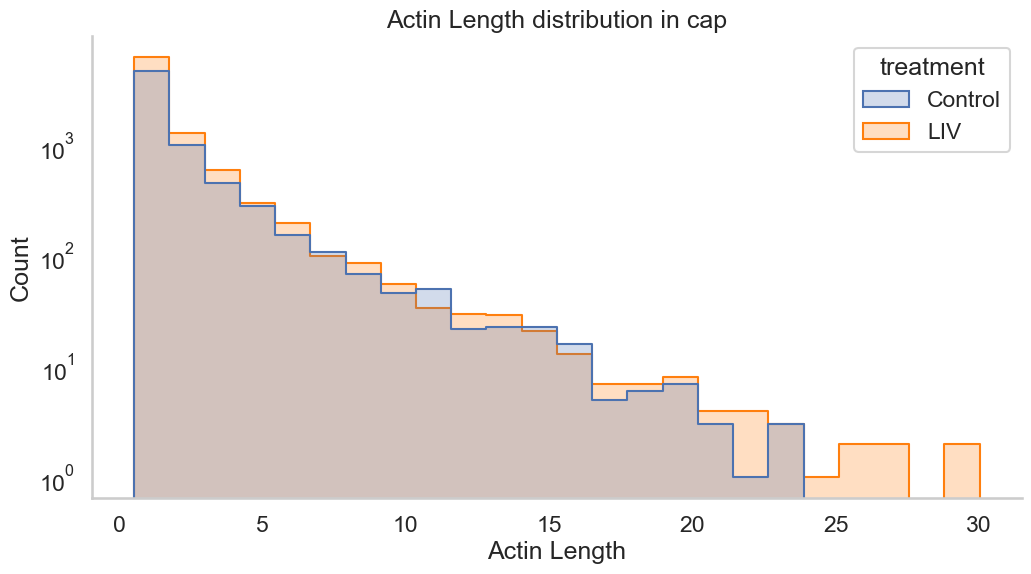

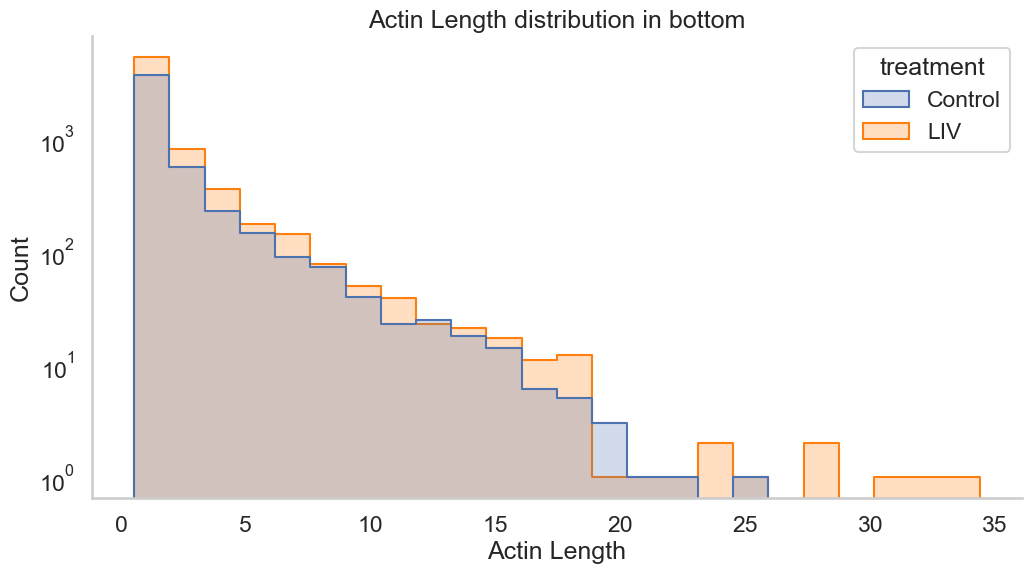

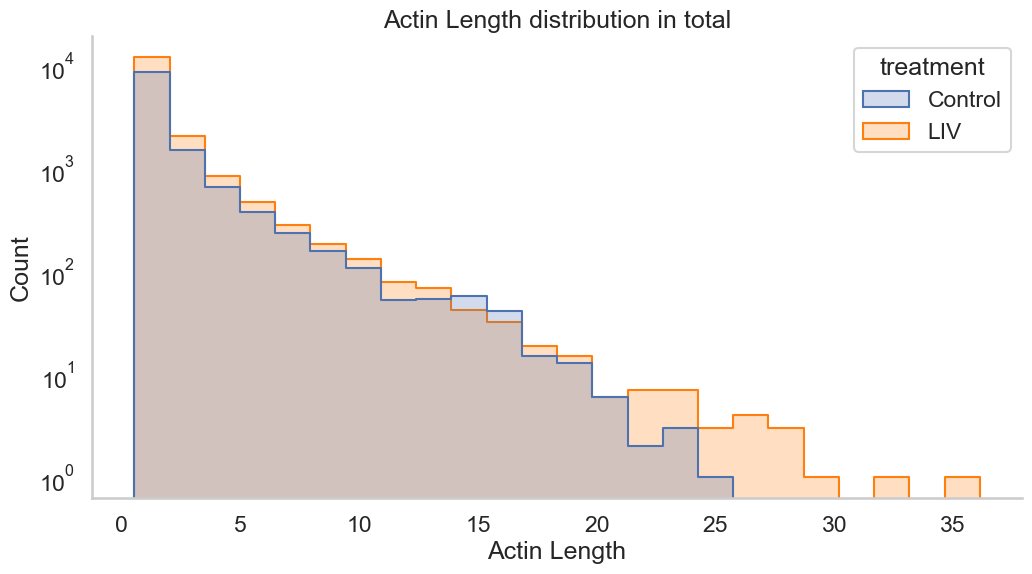

In [112]:
ind_df_w20_len05_CAP = ind_df_w20_len05[ind_df_w20_len05["part"] == "cap"]
ind_df_w20_len05_BOTTOM = ind_df_w20_len05[ind_df_w20_len05["part"] == "bottom"]
ind_df_w20_len05_TOTAL = ind_df_w20_len05[ind_df_w20_len05["part"] == "whole"]

data_parts = [('cap', ind_df_w20_len05_CAP), ('bottom', ind_df_w20_len05_BOTTOM), ('total', ind_df_w20_len05_TOTAL)]

for part_name, data in data_parts:
    # Set the figure size
    plt.figure(figsize=(12, 6))

    ax = sns.histplot(data, x="Actin Length", hue="treatment", element="step", bins=24, log_scale=(False, True), palette=pal)

    # Set the title
    ax.set_title(f'Actin Length distribution in {part_name}')

    # Remove axes spines
    sns.despine()

    plt.show()


C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\204421645.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='treatment', y='Actin Length', data=df, ax=ax, capsize=.1, ci='sd', palette=pal, saturation=0.8)
C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\204421645.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='treatment', y='Actin Length', data=df, ax=ax, capsize=.1, ci='sd', palette=pal, saturation=0.8)


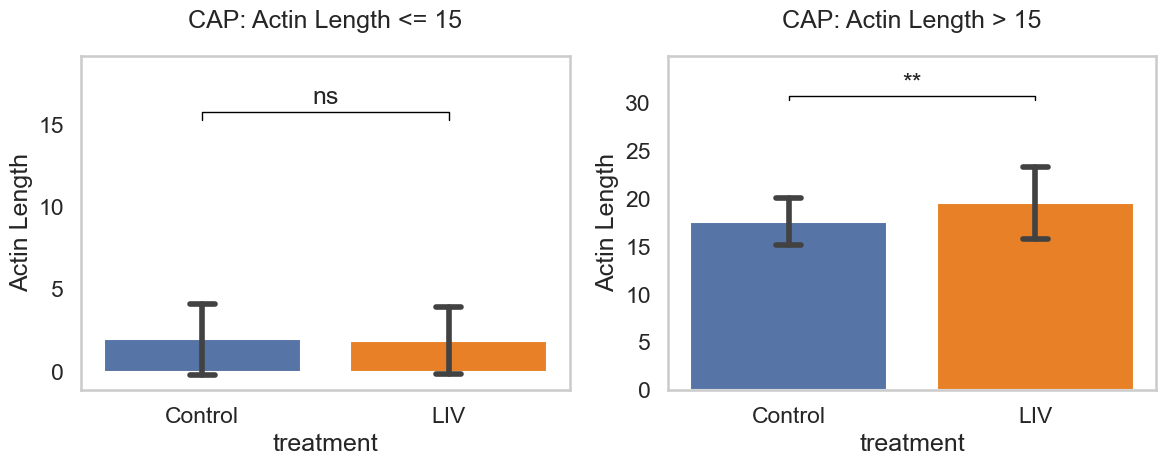

C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\204421645.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='treatment', y='Actin Length', data=df, ax=ax, capsize=.1, ci='sd', palette=pal, saturation=0.8)
C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\204421645.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='treatment', y='Actin Length', data=df, ax=ax, capsize=.1, ci='sd', palette=pal, saturation=0.8)


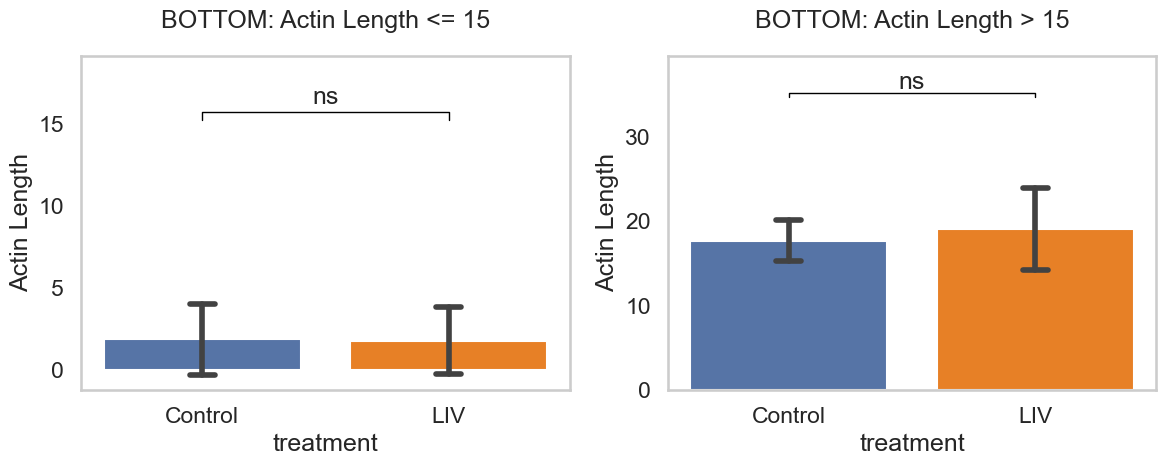

C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\204421645.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='treatment', y='Actin Length', data=df, ax=ax, capsize=.1, ci='sd', palette=pal, saturation=0.8)
C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\204421645.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='treatment', y='Actin Length', data=df, ax=ax, capsize=.1, ci='sd', palette=pal, saturation=0.8)


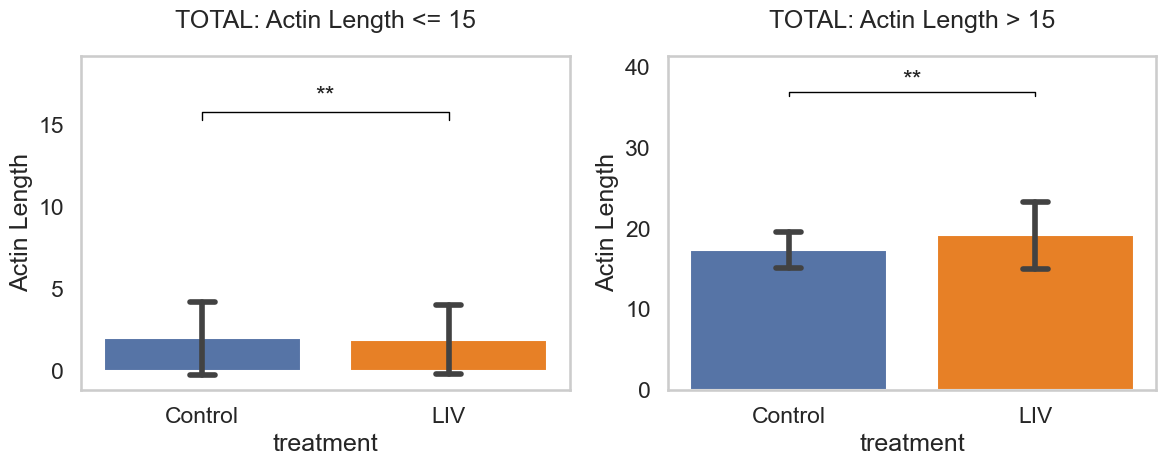

In [113]:
cut_off = 15

def add_significance_bar(start, end, height, p_value, ax):
    # Draw a line with small vertical dashes at each end
    ax.plot([start, start, end, end], [height, height+ 3, height + 3, height], color='none', lw=1)
    ax.plot([start, start, end, end], [height, height+0.5, height+0.5, height], color='black', lw=1)
    # Add text '***', '**', '*' or 'ns' depending on p_value
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'ns'
    ax.text((start + end) / 2, height + 1, text, ha='center')

dataframes = [ind_df_w20_len05_CAP, ind_df_w20_len05_BOTTOM, ind_df_w20_len05_TOTAL]
titles = ["CAP", "BOTTOM", "TOTAL"]

for df, title in zip(dataframes, titles):
    # Filter data based on 'Actin Length'
    df1 = df.loc[df["Actin Length"] <= cut_off]
    df2 = df.loc[df["Actin Length"] > cut_off]

    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), facecolor='none')

    # List of dataframes and corresponding axes
    dfs = [(df1, axes[0]), (df2, axes[1])]

    for df, ax in dfs:
        # Set the background of subplot to transparent
        ax.set_facecolor('none')

        # Bar plot
        sns.barplot(x='treatment', y='Actin Length', data=df, ax=ax, capsize=.1, ci='sd', palette=pal, saturation=0.8)

        # Perform the Mann-Whitney U test
        group1 = df[df['treatment'] == 'Control']['Actin Length']
        group2 = df[df['treatment'] == 'LIV']['Actin Length']
        stat, p = mannwhitneyu(group1, group2)

        # Add significance bar
        height = max(group1.max(), group2.max()) + 0.3  # Here we add 0.3 to the height
        add_significance_bar(0, 1, height, p, ax)

    # Set a title for each subplot
    axes[0].set_title(f'{title}: Actin Length <= {cut_off}', pad=20)
    axes[1].set_title(f'{title}: Actin Length > {cut_off}', pad=20)

    plt.subplots_adjust(top=0.85)
    plt.tight_layout()
    fig.savefig(f'figures/{title.lower()}_len.png', format='png')
    plt.show()


## Actin Volume


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

cap_Control vs. cap_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:4.212e-13 U_stat=2.989e+07
bottom_Control vs. bottom_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:7.927e-04 U_stat=1.798e+07
whole_Control vs. whole_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:2.509e-02 U_stat=9.737e+07


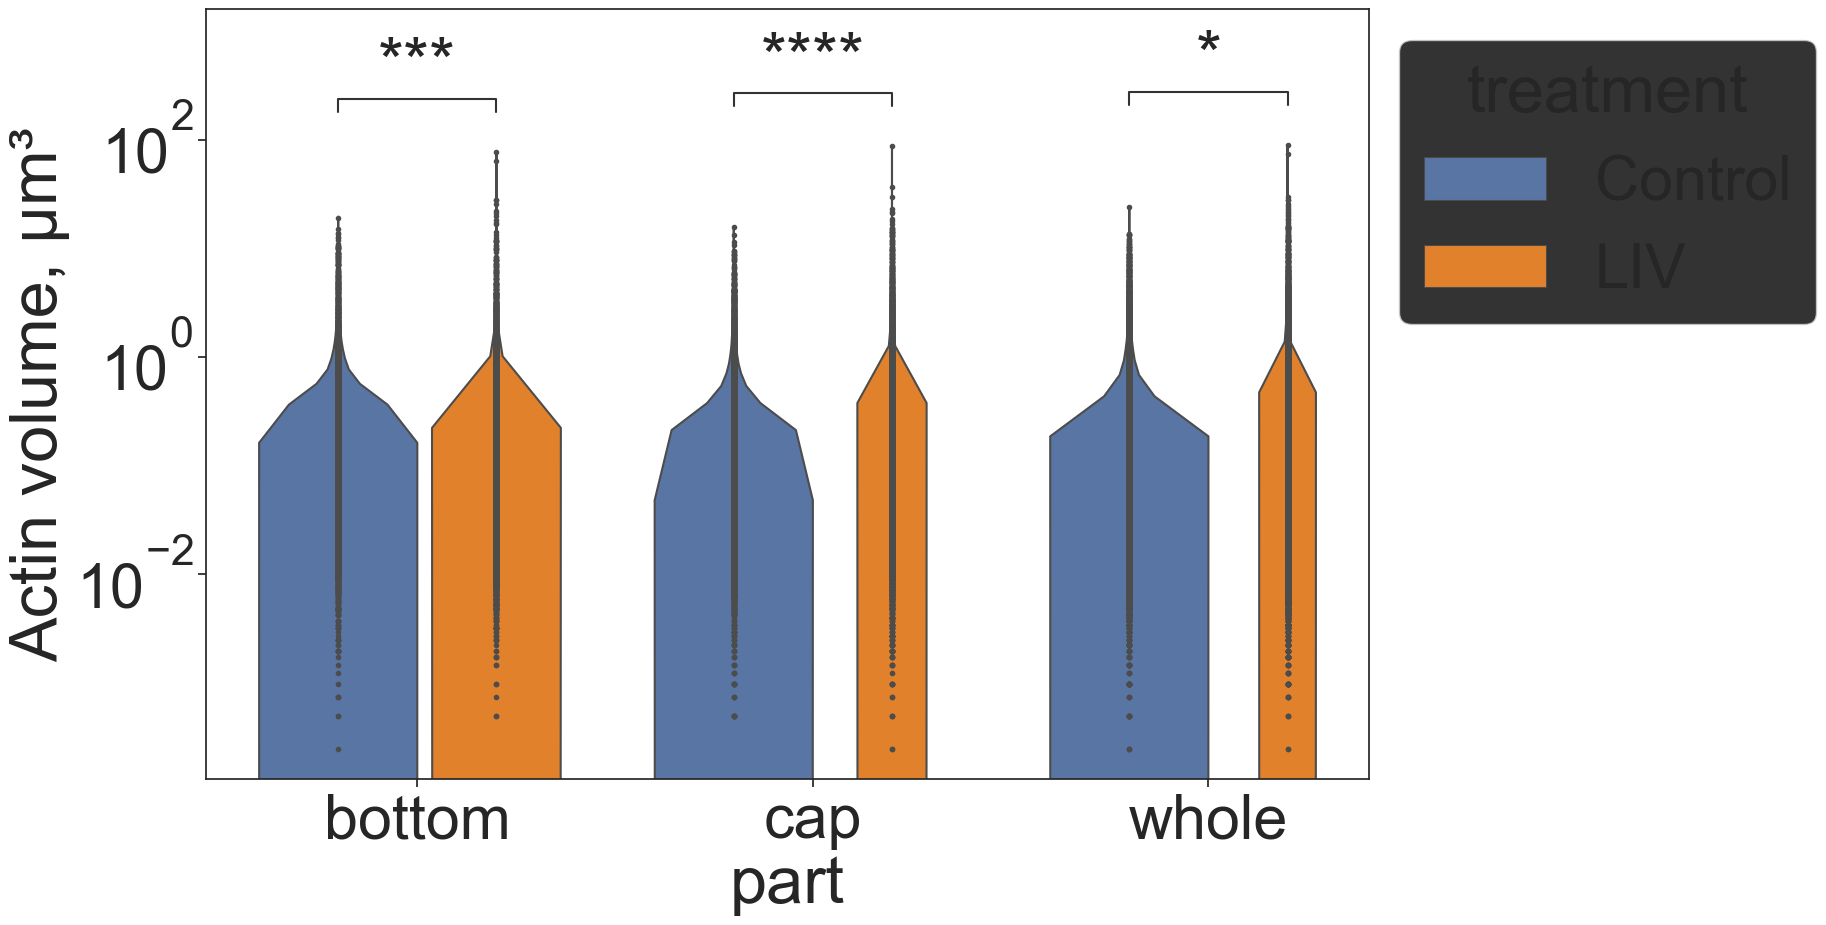

In [114]:
sns.set(font_scale=4, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")



significanceComparisons = [(('cap','LIV'), ('cap','Control')),
                           (('bottom','LIV'), ('bottom','Control')),
                           (('whole','LIV'), ('whole','Control'))]

fig_args = {'x': 'part',
            'y': 'Actin Volume',
            'hue':'treatment',
            'data': ind_df_w20_len05,
            'dodge': True,
            'palette': pal,
            'inner' : 'point',
            'annot_kws': {"fontsize":15},
            'transparent': True }

configuration = {'test':'Mann-Whitney',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.violinplot(ax=ax, **fig_args)
ax.set_yscale('log')
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Actin volume, µm\u00b3")
fig.savefig(f'figures/actin_volume.png', format='png')


## Actin Xsection


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

cap_Control vs. cap_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:3.271e-41 U_stat=2.807e+07
bottom_Control vs. bottom_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:2.042e-06 U_stat=1.824e+07
whole_Control vs. whole_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:6.619e-09 U_stat=9.493e+07


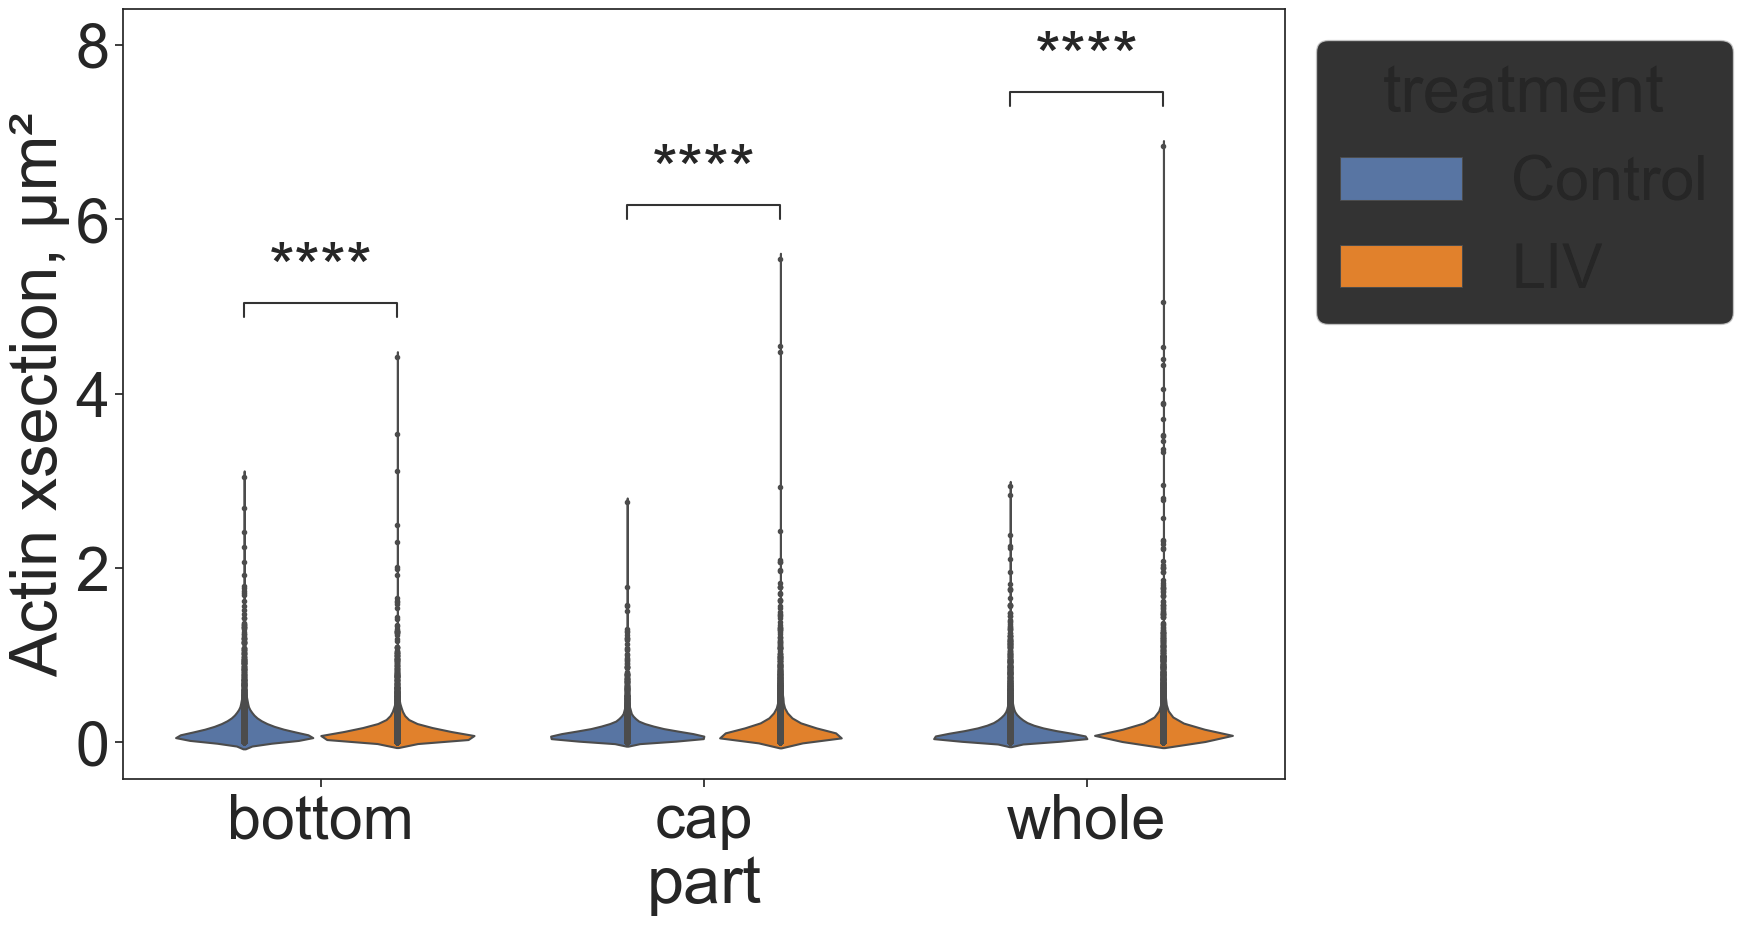

In [115]:
fig_args = {'x': 'part',
            'y': 'Actin Xsection',
            'hue':'treatment',
            'data': ind_df_w20_len05,
            'dodge': True,
            'palette': pal,
            'inner' : 'point',
            'annot_kws': {"fontsize":15}}

configuration = {'test':'Mann-Whitney',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.violinplot(ax=ax, **fig_args)
# ax.set_yscale('log')
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Actin xsection, µm\u00b2")
fig.savefig(f'figures/actin_xsection.png', format='png')

In [116]:
ind_df_w20_len05
ind_df_w20_len05.to_csv('ind_df_w20_len05.csv', index=False)

agg_df_w20_len05.to_csv('agg_df_w20_len05.csv', index=False)

## Actin Length


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

cap_Control vs. cap_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:5.668e-02 U_stat=3.258e+07
bottom_Control vs. bottom_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:1.111e-01 U_stat=1.765e+07
whole_Control vs. whole_LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:2.157e-03 U_stat=1.010e+08


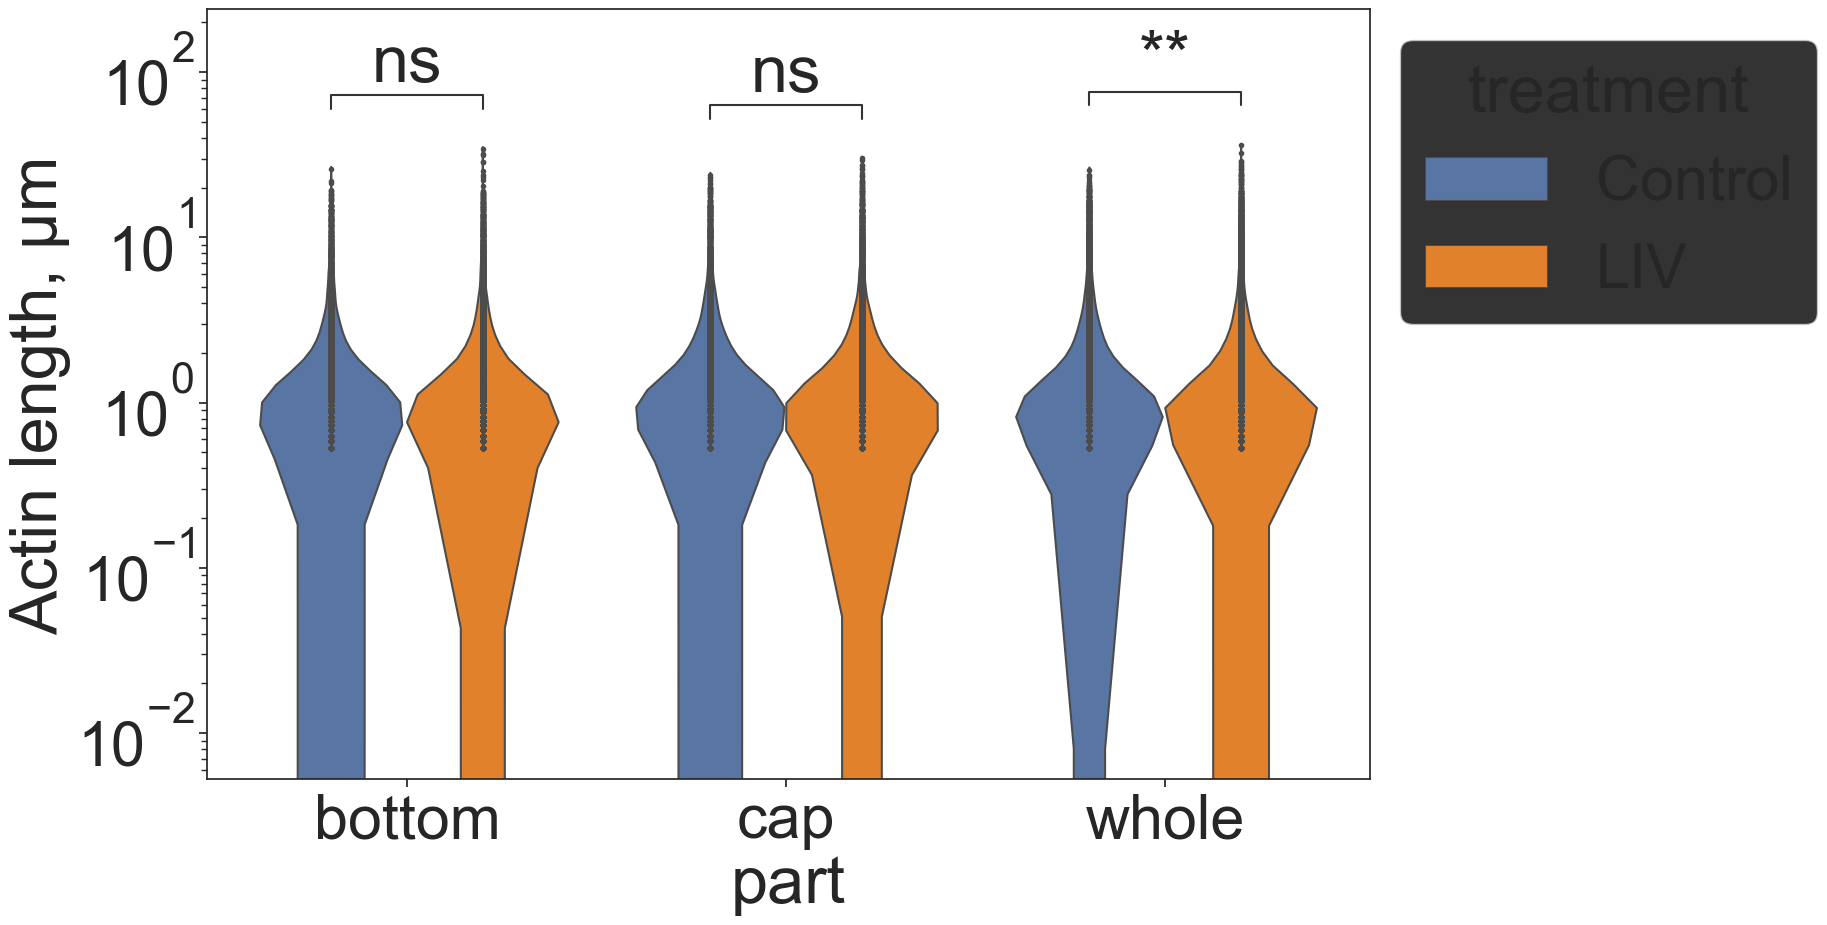

In [117]:
fig_args = {'x': 'part',
            'y': 'Actin Length',
            'hue':'treatment',
            'data': ind_df_w20_len05,
            'dodge': True,
            'palette': pal,
            'inner' : 'point',
            'annot_kws': {"fontsize":15}}

configuration = {'test':'Mann-Whitney',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.violinplot(ax=ax, **fig_args)
ax.set_yscale('log')
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Actin length, μm")
fig.savefig(f'figures/actin_length.png', format='png')

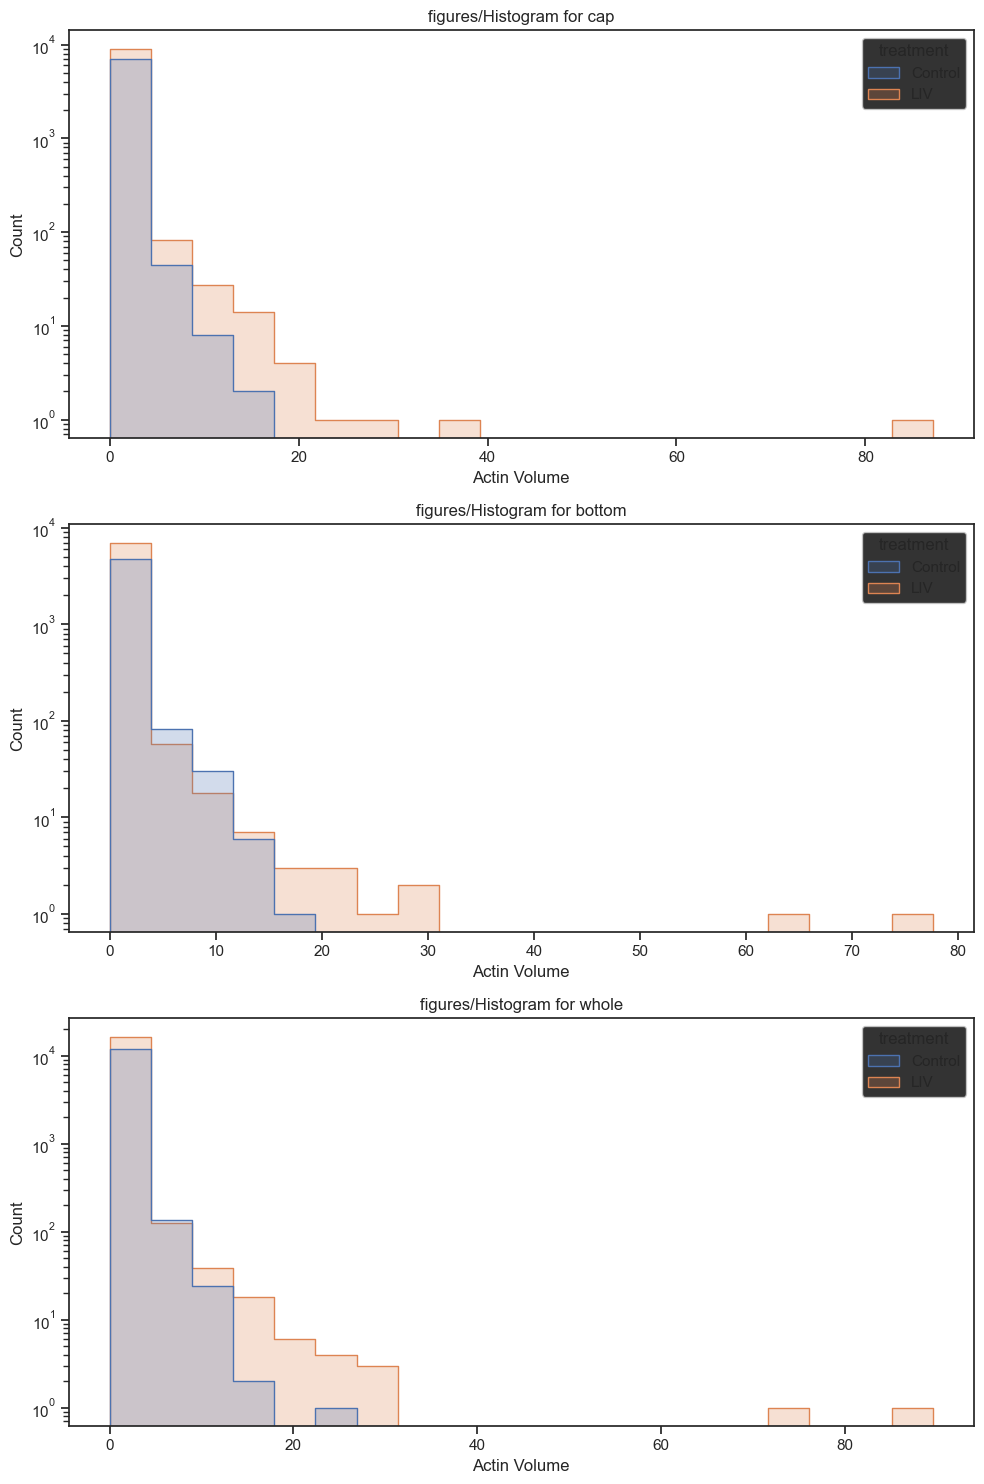

In [118]:
sns.set(font_scale=1, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")
import matplotlib.pyplot as plt
import seaborn as sns

parts = ['cap', 'bottom', 'whole']

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

for i, part in enumerate(parts):
    temp_df = ind_df_w20_len05[ind_df_w20_len05['part'] == part]
    sns.histplot(temp_df, x="Actin Volume", hue="treatment", element="step", bins=20, ax=axs[i])
    axs[i].set_yscale("log")  # Set y-axis to be logarithmic
    axs[i].set_title(f'figures/Histogram for {part}')
fig.savefig(f'figures/actin_volume.png', format='png')

plt.tight_layout()
plt.show()



## Nucleus

In [119]:
agg_df_w20_len05

,image_name,img_num,cell_num,"nucleus_volume, cubic_micrometre","nucleus_length, micrometre","nucleus_width, micrometre","nucleus_high, micrometre",nucleus_total_intensity,min_len_threshold,treatment,actin_model,part,branching_nodes,f-actin_signal_intensity,fiber_intensity,fiber_length,fiber_volume,fiber_num
0,control-Experiment-903-LSM Plus Processing-01-...,0.0,0.0,753.091148,15.613676,12.752785,6.30,1.080275e+10,0.5,Control,w20,total,4.0,2.998215e+09,2.475574e+08,54.793336,6.984761,63.0
1,control-Experiment-903-LSM Plus Processing-01-...,0.0,0.0,753.091148,15.613676,12.752785,6.30,1.080275e+10,0.5,Control,w20,cap,3.0,1.496611e+09,9.118996e+07,36.464238,2.709274,45.0
2,control-Experiment-903-LSM Plus Processing-01-...,0.0,0.0,753.091148,15.613676,12.752785,6.30,1.080275e+10,0.5,Control,w20,bottom,0.0,1.501079e+09,1.556848e+08,12.995234,4.252034,12.0
3,control-Experiment-903-LSM Plus Processing-01-...,0.0,1.0,781.937727,20.123216,12.558827,5.46,1.249183e+10,0.5,Control,w20,total,20.0,4.565868e+09,6.932591e+08,85.244854,20.707896,72.0
4,control-Experiment-903-LSM Plus Processing-01-...,0.0,1.0,781.937727,20.123216,12.558827,5.46,1.249183e+10,0.5,Control,w20,cap,1.0,1.519939e+09,8.236923e+07,23.323535,2.215758,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,4.0,1862.147858,24.487287,21.383948,5.67,2.254375e+10,0.5,LIV,w20,cap,101.0,1.154349e+10,3.064592e+09,287.398323,60.472793,125.0
632,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,4.0,1862.147858,24.487287,21.383948,5.67,2.254375e+10,0.5,LIV,w20,bottom,6.0,9.238858e+09,6.269690e+08,135.965058,17.196999,91.0
633,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,5.0,920.511614,17.941181,16.534980,5.46,1.205816e+10,0.5,LIV,w20,total,29.0,1.205891e+10,1.303780e+09,252.194816,31.019133,108.0
634,6xLIV-Experiment-891-LSM Plus Processing-10-14...,9.0,5.0,920.511614,17.941181,16.534980,5.46,1.205816e+10,0.5,LIV,w20,cap,13.0,5.127613e+09,7.832627e+08,119.672526,16.670649,58.0


In [120]:
a = agg_df_w20_len05[(agg_df_w20_len05['part'] == 'cap') & (agg_df_w20_len05['treatment'] == 'Control')]
len(a)

102

In [121]:
agg_df_w20_len05_CAP = agg_df_w20_len05[agg_df_w20_len05['part'] == 'cap']
agg_df_w20_len05_CAP.columns

Index(['image_name', 'img_num', 'cell_num', 'nucleus_volume, cubic_micrometre',
       'nucleus_length, micrometre', 'nucleus_width, micrometre',
       'nucleus_high, micrometre', 'nucleus_total_intensity',
       'min_len_threshold', 'treatment', 'actin_model', 'part',
       'branching_nodes', 'f-actin_signal_intensity', 'fiber_intensity',
       'fiber_length', 'fiber_volume', 'fiber_num'],
      dtype='object')

### Nucleus Volume

<AxesSubplot:xlabel='nucleus_volume, cubic_micrometre', ylabel='Count'>

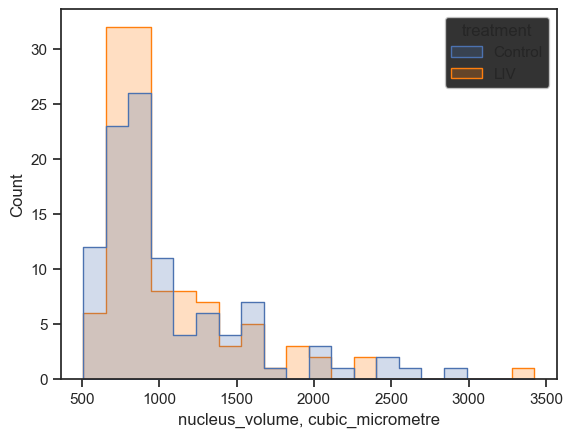

In [122]:
sns.histplot(agg_df_w20_len05_CAP, x="nucleus_volume, cubic_micrometre", hue="treatment", element="step", bins=20, palette=pal)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:6.613e-01 U_stat=5.806e+03


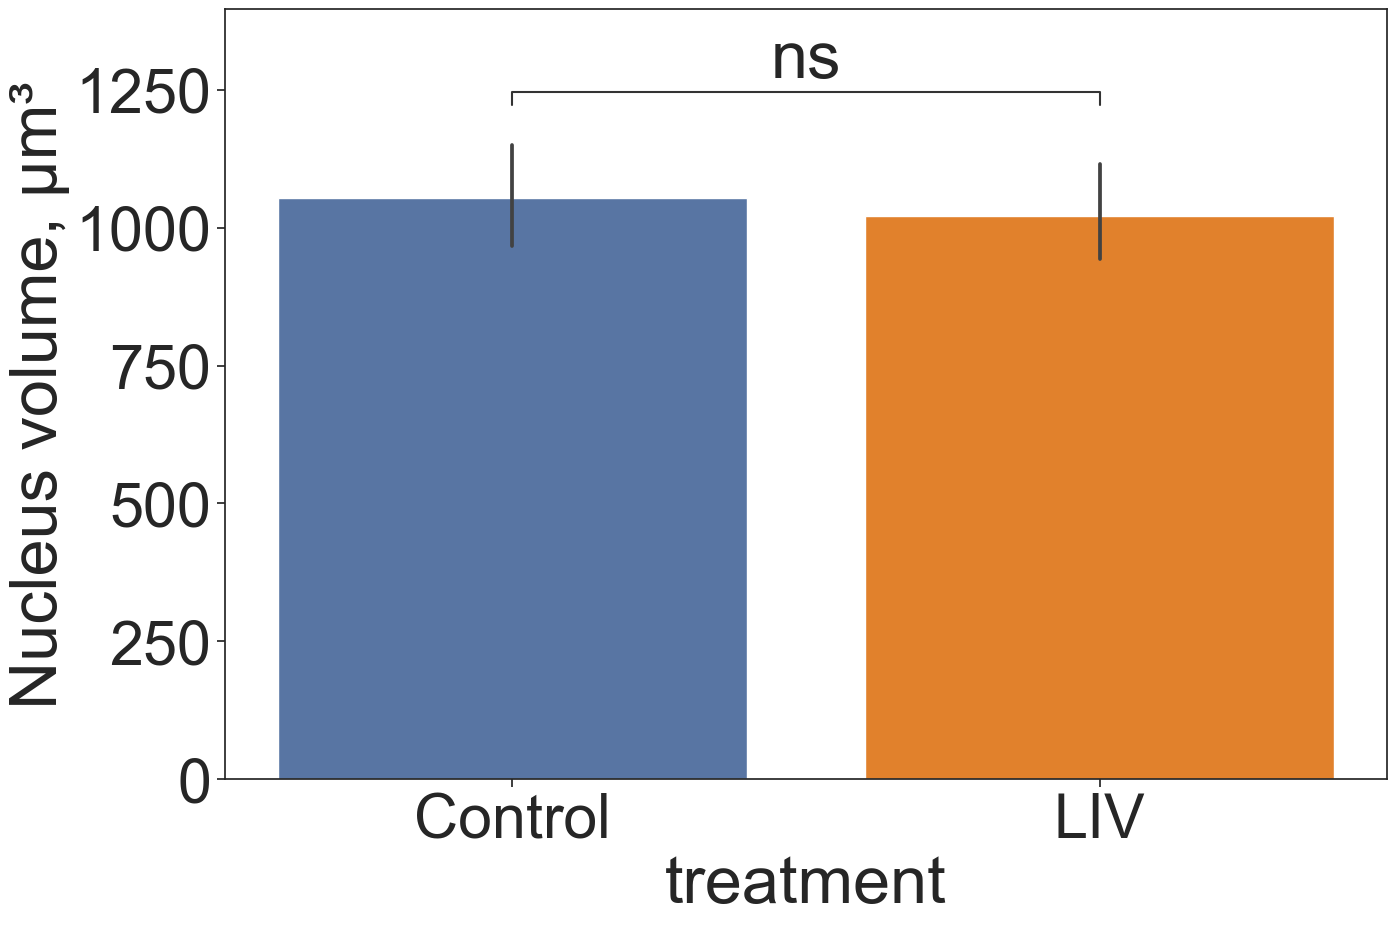

In [123]:
sns.set(font_scale=4, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")

significanceComparisons = [(('LIV'), ('Control'))]

fig_args = { 'x': 'treatment',
            'y': 'nucleus_volume, cubic_micrometre',
            'data': agg_df_w20_len05_CAP,
            'dodge': True,
            'palette': pal,
             }

configuration = {'test':'Mann-Whitney',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.barplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Nucleus volume, µm\u00b3")
fig.savefig(f'Nucleus volume.png', format='png')


### Nucleus Length


<AxesSubplot:xlabel='nucleus_length, micrometre', ylabel='Count'>

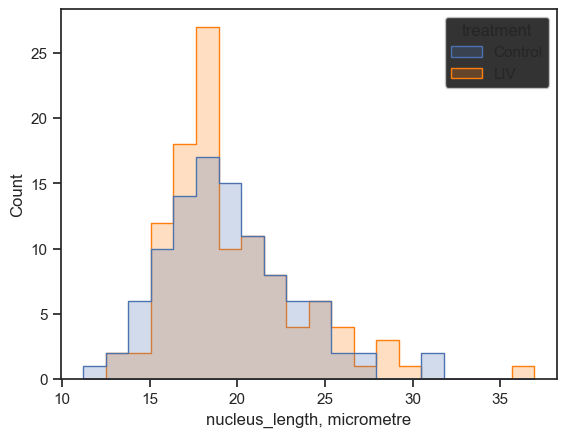

In [124]:
sns.set(font_scale=1, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")
sns.histplot(agg_df_w20_len05_CAP, x="nucleus_length, micrometre", hue="treatment", element="step", bins=20, palette=pal)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:9.232e-01 U_stat=5.566e+03


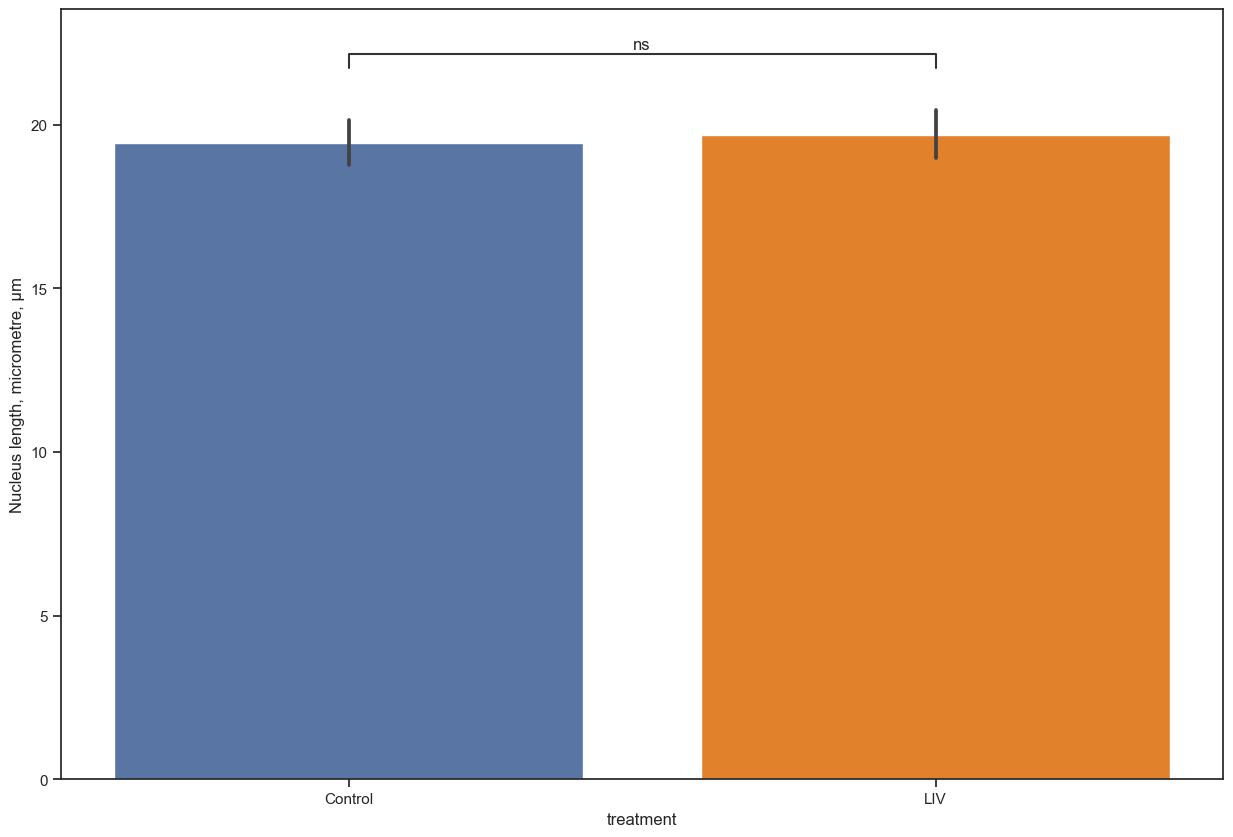

In [125]:
fig_args = { 'x': 'treatment',
            'y': 'nucleus_length, micrometre',
            'data': agg_df_w20_len05_CAP,
            'dodge': True,
            'palette': pal,
             }

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.barplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Nucleus length, micrometre, µm")
fig.savefig(f'Nucleus length.png', format='png')

### Nucleus Width

<AxesSubplot:xlabel='nucleus_width, micrometre', ylabel='Count'>

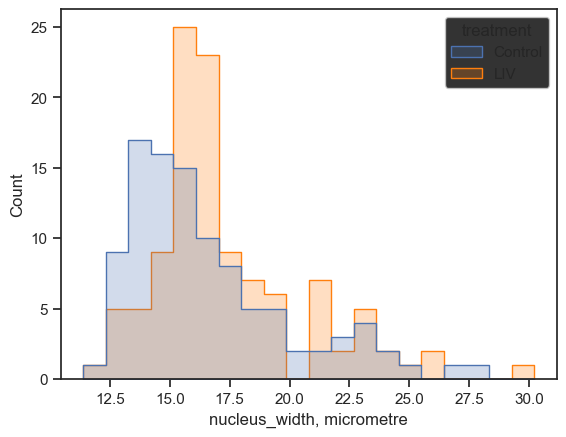

In [126]:
sns.set(font_scale=1, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")
sns.histplot(agg_df_w20_len05_CAP, x="nucleus_width, micrometre", hue="treatment", element="step", bins=20, palette=pal)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:7.660e-03 U_stat=4.420e+03


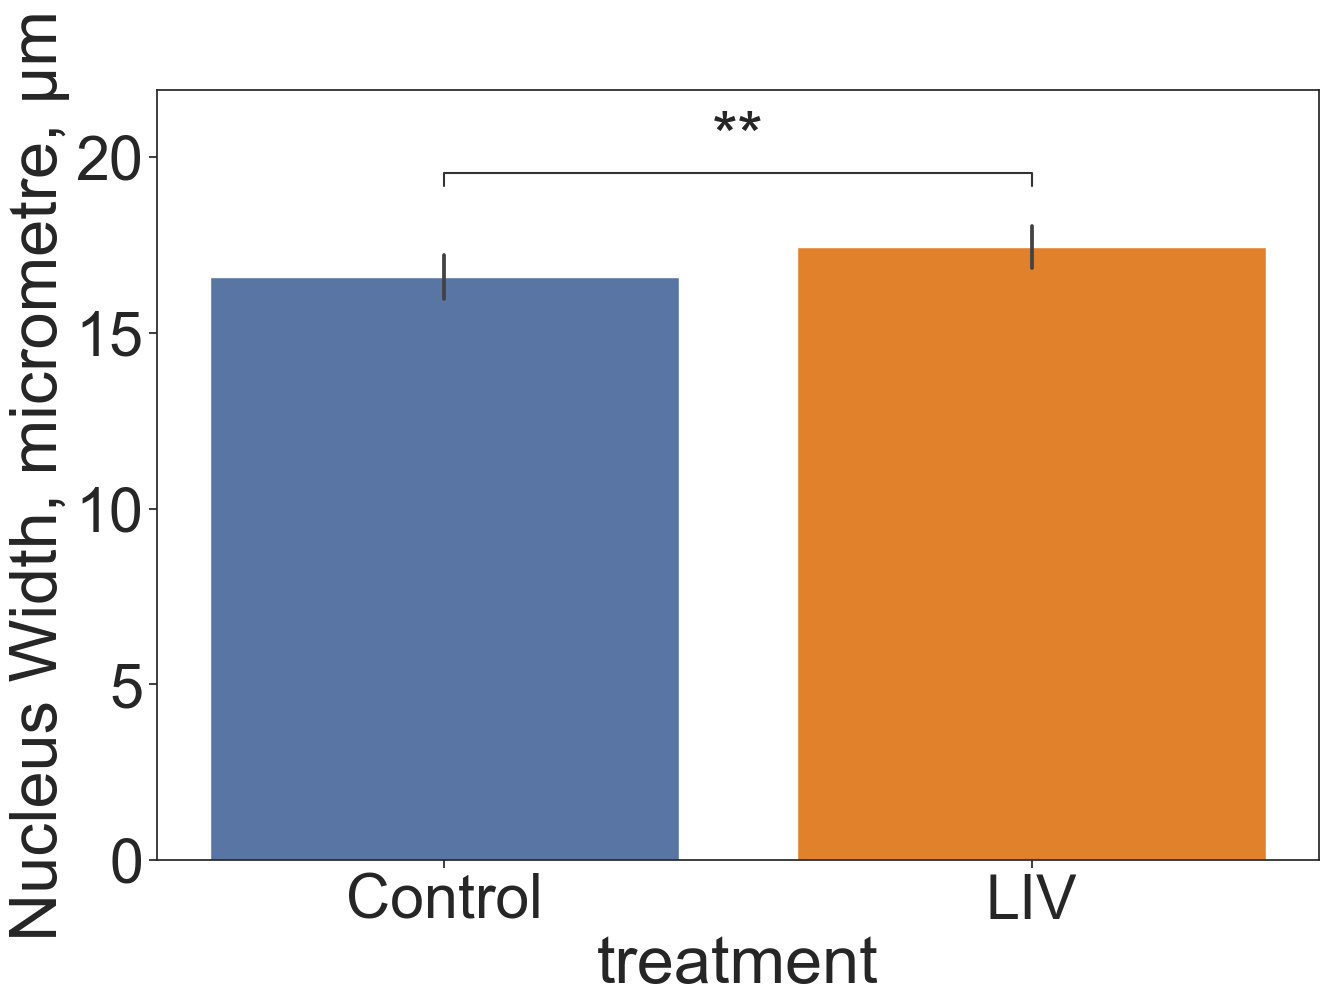

In [127]:
sns.set(font_scale=4, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")

fig_args = { 'x': 'treatment',
            'y': 'nucleus_width, micrometre',
            'data': agg_df_w20_len05_CAP,
            'dodge': True,
            'palette': pal,
             }

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.barplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Nucleus Width, micrometre, µm")
fig.savefig(f'Nucleus Width, micrometre.png', format='png')

### Nucleus High

<AxesSubplot:xlabel='nucleus_high, micrometre', ylabel='Count'>

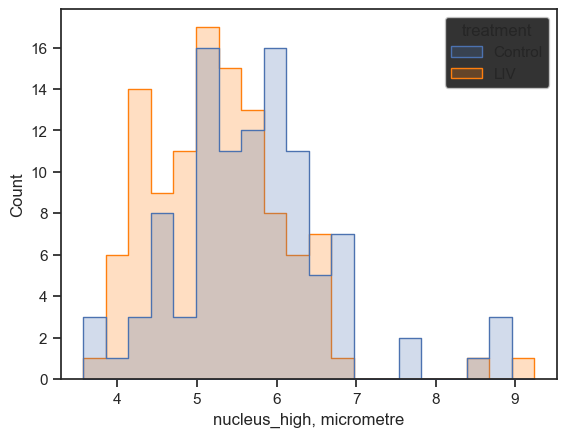

In [128]:
sns.set(font_scale=1, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")
sns.histplot(agg_df_w20_len05_CAP, x="nucleus_high, micrometre", hue="treatment", element="step", bins=20, palette=pal)

In [129]:
b = agg_df_w20_len05_CAP[agg_df_w20_len05_CAP["treatment"]=="LIV"]
agg_df_w20_len05_CAP['nucleus_volume, cubic_micrometre'].mean()

1036.9196012839632

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. LIV: Mann-Whitney-Wilcoxon test two-sided, P_val:1.934e-04 U_stat=7.268e+03


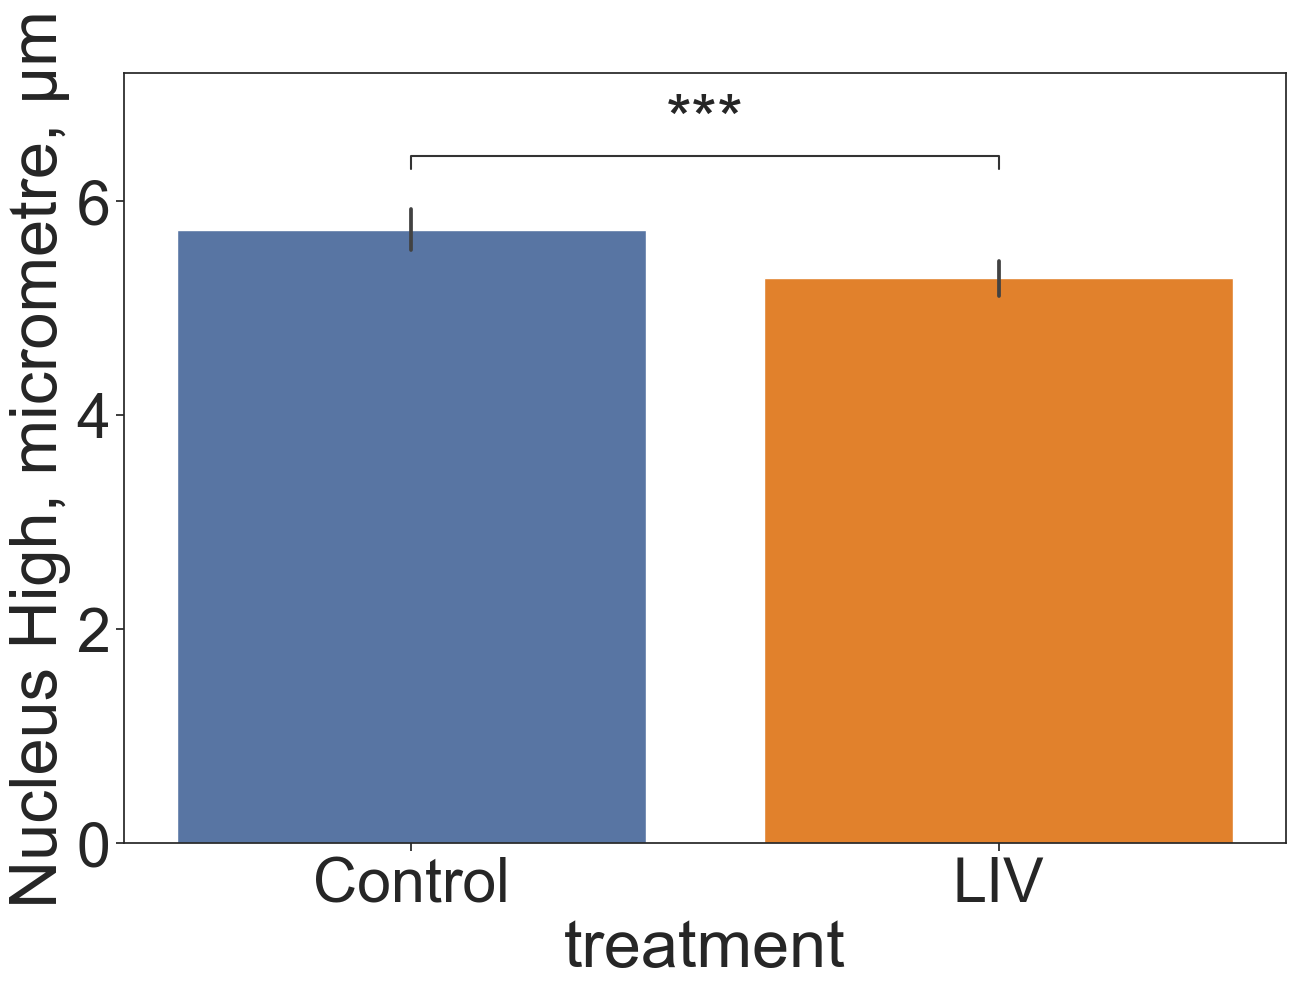

In [130]:

sns.set(font_scale=4, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")

fig_args = {'x': 'treatment',
            'y': 'nucleus_high, micrometre',
            'data': agg_df_w20_len05_CAP,
            'dodge': True,
            'palette': pal,
            }

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.barplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Nucleus High, micrometre, µm")
fig.savefig(f'Nucleus High, micrometre.png', format='png')

## We met with Madison today and we want ( whenever you can )

In [131]:
ind_df_w20_len10 = ind_df_w20_len05[ind_df_w20_len05['Actin Length'] >= 10]
ind_df_w20_len10_CAP = ind_df_w20_len10[ind_df_w20_len10['part'] == 'cap']
ind_df_w20_len10_CAP

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Intensity,img_num,cell_num,part,min_len_threshold,treatment,actin_model,temp_part
53581,40,19.686809,0.454215,8.942035,407,455591048,0,2,cap,0.5,Control,w20,cap
53599,58,10.667729,0.371673,3.964911,221,180148831,0,2,cap,0.5,Control,w20,cap
53612,71,14.740862,0.283394,4.177476,305,205360507,0,2,cap,0.5,Control,w20,cap
53618,77,10.764709,0.269845,2.904803,223,116379303,0,2,cap,0.5,Control,w20,cap
53923,10,11.249605,0.151843,1.708171,233,71485147,0,3,cap,0.5,Control,w20,cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193537,27,13.140703,0.235163,3.090211,272,123950523,9,0,cap,0.5,LIV,w20,cap
195074,42,18.232119,0.319581,5.826642,377,326945665,9,4,cap,0.5,LIV,w20,cap
195076,44,18.280609,0.365326,6.678382,378,396374323,9,4,cap,0.5,LIV,w20,cap
195081,49,17.262325,0.213539,3.686182,357,190721128,9,4,cap,0.5,LIV,w20,cap


## Average Number of Actin Fibers Over N μm

In [132]:
N = 5

### LIV

In [133]:
ind_df_w20_len05_CAP_LIV = ind_df_w20_len05[(ind_df_w20_len05['part'] == "cap") & (ind_df_w20_len05['treatment'] == "LIV")]
ind_df_w20_len05_CAP_LIV

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Intensity,img_num,cell_num,part,min_len_threshold,treatment,actin_model,temp_part
162956,0,2.521463,0.109465,0.276013,53,10740071,10,0,cap,0.5,LIV,w20,cap
162957,1,2.957870,0.124781,0.369087,62,15543830,10,0,cap,0.5,LIV,w20,cap
162958,2,1.309221,0.125965,0.164917,28,6516404,10,0,cap,0.5,LIV,w20,cap
162959,3,0.581876,0.025457,0.014813,13,582396,10,0,cap,0.5,LIV,w20,cap
162960,4,5.042927,0.085967,0.433523,105,16713956,10,0,cap,0.5,LIV,w20,cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195479,53,0.727345,0.048878,0.035551,16,1380685,9,5,cap,0.5,LIV,w20,cap
195480,54,3.685216,0.134454,0.495490,77,24474509,9,5,cap,0.5,LIV,w20,cap
195481,55,3.006360,0.113079,0.339955,63,15799240,9,5,cap,0.5,LIV,w20,cap
195482,56,0.678855,0.064370,0.043698,15,1774163,9,5,cap,0.5,LIV,w20,cap


In [134]:
ind_df_w20_len_N_CAP_LIV = ind_df_w20_len05_CAP_LIV[ind_df_w20_len05_CAP_LIV['Actin Length'] >= N]

In [135]:
# group by 'image_num' and 'cell_num' and count the unique combinations
unique_combinations_len_N_CAP_LIV = ind_df_w20_len_N_CAP_LIV.groupby(['img_num', 'cell_num']).size().reset_index(name='count')
unique_combinations_len_N_CAP_LIV['count'].mean()

7.559139784946237

In [136]:
# Number of cells that has fiber more then N micron
len(unique_combinations_len_N_CAP_LIV)

93

In [137]:
# Average number of fiber over 10 micron for LIV set
unique_combinations_len_N_CAP_LIV['count'].sum()/110

6.390909090909091

In [138]:
# Average cross-section of LIV fibers over N micron
ind_df_w20_len_N_CAP_LIV["Actin Xsection"].mean()

0.31571057271139435

In [139]:
# Save the dataframe to a CSV file
ind_df_w20_len_N_CAP_LIV.to_csv(f'output_files/individual_fibers_min_len_{N}_w20_CAP_LIV.csv', index=False)

In [140]:
# Create the Aggregated_ID column
ind_df_w20_len_N_CAP_LIV['Aggregated_ID'] = ind_df_w20_len_N_CAP_LIV['img_num'].astype(str) + "_" + ind_df_w20_len_N_CAP_LIV['cell_num'].astype(str)

# Group by the new Aggregated_ID column
grouped = ind_df_w20_len_N_CAP_LIV.groupby('Aggregated_ID')

# Aggregate the data
aggrageted_df_w20_len_N_CAP_LIV = grouped.agg({
    'Actin Length':'sum',  # Mean of Actin Length
    'Actin Xsection': 'mean',  # Mean of Actin Xsection
    'Actin Volume': 'sum',    # Mean of Actin Volume
    'Aggregated_ID': 'count'   # Count of occurrences in each group
}).rename(columns={'Aggregated_ID': 'Actin number',
                   'Actin Length':'Sum Actin Length',
                   'Actin Xsection': 'Mean Actin Xsection',
                   'Actin Volume': 'Sum Actin Volume'})

# Reset the index if you want Aggregated_ID back as a column
aggrageted_df_w20_len_N_CAP_LIV.reset_index(inplace=True)

aggrageted_df_w20_len_N_CAP_LIV.to_csv(f'output_files/aggregated_fibers_min_len_{N}_w20_CAP_LIV.csv', index=False)
aggrageted_df_w20_len_N_CAP_LIV


C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\174081720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df_w20_len_N_CAP_LIV['Aggregated_ID'] = ind_df_w20_len_N_CAP_LIV['img_num'].astype(str) + "_" + ind_df_w20_len_N_CAP_LIV['cell_num'].astype(str)


,Aggregated_ID,Sum Actin Length,Mean Actin Xsection,Sum Actin Volume,Actin number
0,10_0,70.649461,0.154851,13.318250,8
1,10_1,86.311627,0.131951,11.736235,11
2,10_2,141.735329,0.354020,62.142944,10
3,10_3,149.736126,0.203398,34.412021,15
4,11_0,106.725782,0.173707,18.305989,13
...,...,...,...,...,...
88,9_0,159.821979,0.235429,40.167067,12
89,9_1,10.425281,0.176787,1.837536,2
90,9_3,29.481724,0.446724,13.832009,5
91,9_4,129.709889,0.225239,31.670899,14


### Control

In [141]:
ind_df_w20_len05_CAP_CNT = ind_df_w20_len05[(ind_df_w20_len05['part'] == "cap") & (ind_df_w20_len05['treatment'] == "Control")]
ind_df_w20_len05_CAP_CNT

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Intensity,img_num,cell_num,part,min_len_threshold,treatment,actin_model,temp_part
53069,0,0.678855,0.074189,0.050364,15,1725570,0,0,cap,0.5,Control,w20,cap
53070,1,1.115263,0.089653,0.099987,24,3367104,0,0,cap,0.5,Control,w20,cap
53071,2,1.551670,0.037549,0.058264,33,1946989,0,0,cap,0.5,Control,w20,cap
53072,3,0.678855,0.181473,0.123194,15,3999472,0,0,cap,0.5,Control,w20,cap
53073,4,1.357711,0.235296,0.319464,29,11543682,0,0,cap,0.5,Control,w20,cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76863,104,0.775835,0.282892,0.219477,17,10543318,9,5,cap,0.5,Control,w20,cap
76864,105,1.163752,0.067461,0.078508,25,2227745,9,5,cap,0.5,Control,w20,cap
76865,106,1.309221,0.065811,0.086162,28,2803739,9,5,cap,0.5,Control,w20,cap
76866,107,1.600159,0.123891,0.198246,34,5921760,9,5,cap,0.5,Control,w20,cap


In [142]:
ind_df_w20_len_N_CAP_CNT = ind_df_w20_len05_CAP_CNT[ind_df_w20_len05_CAP_CNT['Actin Length'] >= N]


In [143]:
# group by 'image_num' and 'cell_num' and count the unique combinations
unique_combinations_len_N_CAP_CNT = ind_df_w20_len_N_CAP_CNT.groupby(['img_num', 'cell_num']).size().reset_index(name='count')
unique_combinations_len_N_CAP_CNT['count'].mean()

7.439024390243903

In [144]:
# Number of cells that has fiber more than N micron
len(unique_combinations_len_N_CAP_CNT)

82

In [145]:
unique_combinations_len_N_CAP_CNT['count'].sum()/102

5.980392156862745

In [146]:
# Average cross-section of Control fibers over 7 micron
ind_df_w20_len_N_CAP_CNT["Actin Xsection"].mean()

0.2350212511670486

In [147]:
# Save the dataframe to a CSV file
ind_df_w20_len_N_CAP_CNT.to_csv(f'output_files/individual_fibers_min_len_{N}_w20_CAP_Control.csv', index=False)

In [148]:
# Create the Aggregated_ID column
ind_df_w20_len_N_CAP_CNT['Aggregated_ID'] = ind_df_w20_len_N_CAP_CNT['img_num'].astype(str) + "_" + ind_df_w20_len_N_CAP_CNT['cell_num'].astype(str)

# Group by the new Aggregated_ID column
grouped = ind_df_w20_len_N_CAP_CNT.groupby('Aggregated_ID')

# Aggregate the data
aggrageted_df_w20_len_N_CAP_CNT = grouped.agg({
    'Actin Length':'sum',  # Mean of Actin Length
    'Actin Xsection': 'mean',  # Mean of Actin Xsection
    'Actin Volume': 'sum',    # Mean of Actin Volume
    'Aggregated_ID': 'count'   # Count of occurrences in each group
}).rename(columns={'Aggregated_ID': 'Actin number',
                   'Actin Length':'Sum Actin Length',
                   'Actin Xsection': 'Mean Actin Xsection',
                   'Actin Volume': 'Sum Actin Volume'})

# Reset the index if you want Aggregated_ID back as a column
aggrageted_df_w20_len_N_CAP_CNT.reset_index(inplace=True)

aggrageted_df_w20_len_N_CAP_CNT.to_csv(f'output_files/aggregated_fibers_min_len_{N}_w20_CAP_Control.csv', index=False)
aggrageted_df_w20_len_N_CAP_CNT

C:\Users\nnina\AppData\Local\Temp\ipykernel_38208\3523759978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df_w20_len_N_CAP_CNT['Aggregated_ID'] = ind_df_w20_len_N_CAP_CNT['img_num'].astype(str) + "_" + ind_df_w20_len_N_CAP_CNT['cell_num'].astype(str)


,Aggregated_ID,Sum Actin Length,Mean Actin Xsection,Sum Actin Volume,Actin number
0,0_2,102.022283,0.272599,30.724110,11
1,0_3,25.214633,0.117927,2.975905,3
2,0_4,177.472222,0.232447,45.264421,21
3,0_5,26.717813,0.409404,11.341719,3
4,0_6,17.262325,0.236477,4.124149,3
...,...,...,...,...,...
77,9_0,28.560420,0.201248,5.478292,4
78,9_2,100.907020,0.231747,27.938057,9
79,9_3,135.528651,0.188149,27.886458,15
80,9_4,88.542152,0.415878,38.669733,10
